In [1]:
import sys
import datetime
import pandas as pd

path_root = '../../..'
sys.path.append(f'{path_root}/')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "friuli venezia giulia"

path_data = f'{path_root}/data'
path_img_root =  f'{path_data}/imgs/grafici/{level}/{region_name}'
path_csv = f'{path_data}/csv'
csv_in_name = f'{path_csv}/{level}/covid19-{region_name}.csv'

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,31.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,25.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,27.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,28.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
4,2020-02-29T17:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,20.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,2021-02-17T17:00:00,6,Friuli Venezia Giulia,384,59,443,8969,9412,-59,333,...,7.0,9872.0,2807.0,-46.0,13.32,4.71,3.37,11.86,-1.67,-0.62
359,2021-02-18T17:00:00,6,Friuli Venezia Giulia,361,58,419,8991,9410,-2,262,...,11.0,7885.0,2518.0,22.0,13.84,4.45,3.32,10.41,-1.69,-0.02
360,2021-02-19T17:00:00,6,Friuli Venezia Giulia,349,56,405,8956,9361,-49,310,...,15.0,8393.0,2218.0,-35.0,13.83,4.33,3.69,13.98,-3.45,-0.52
361,2021-02-20T17:00:00,6,Friuli Venezia Giulia,348,60,408,8844,9252,-109,326,...,8.0,9792.0,2918.0,-112.0,14.71,4.41,3.33,11.17,7.14,-1.16


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 2, 21, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 284
Nuovi tamponi: 5139.0
Percentuale nuovi positivi/nuovi tamponi: 5.5 %
Nuovi guariti: 254.0
Nuovi deceduti: 8.0
Variazione positivi ricoverati con sintomi: 2.0
Variazione positivi in terapia intensiva: -3.0
Variazione positivi in isolamento dimiciliare: 23.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 2, 21, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-23T17:00:00,6,Friuli Venezia Giulia,595,56,651,11624,12275,-941,512,...,22.0,6648.0,1537.0,-937.0,8.60,5.30,7.70,33.31,-1.75,-7.12
1,2020-12-24T17:00:00,6,Friuli Venezia Giulia,582,56,638,11464,12102,-173,831,...,15.0,11435.0,2576.0,-160.0,8.78,5.27,7.27,32.26,0.00,-1.41
2,2020-12-25T17:00:00,6,Friuli Venezia Giulia,572,54,626,11458,12084,-18,584,...,20.0,5835.0,1541.0,-6.0,8.63,5.18,10.01,37.90,-3.57,-0.15
3,2020-12-26T17:00:00,6,Friuli Venezia Giulia,587,56,643,11482,12125,41,224,...,15.0,1864.0,618.0,24.0,8.71,5.30,12.02,36.25,3.70,0.34
4,2020-12-27T17:00:00,6,Friuli Venezia Giulia,626,58,684,11506,12190,65,144,...,15.0,1287.0,363.0,24.0,8.48,5.61,11.19,39.67,3.57,0.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-02-17T17:00:00,6,Friuli Venezia Giulia,384,59,443,8969,9412,-59,333,...,7.0,9872.0,2807.0,-46.0,13.32,4.71,3.37,11.86,-1.67,-0.62
57,2021-02-18T17:00:00,6,Friuli Venezia Giulia,361,58,419,8991,9410,-2,262,...,11.0,7885.0,2518.0,22.0,13.84,4.45,3.32,10.41,-1.69,-0.02
58,2021-02-19T17:00:00,6,Friuli Venezia Giulia,349,56,405,8956,9361,-49,310,...,15.0,8393.0,2218.0,-35.0,13.83,4.33,3.69,13.98,-3.45,-0.52
59,2021-02-20T17:00:00,6,Friuli Venezia Giulia,348,60,408,8844,9252,-109,326,...,8.0,9792.0,2918.0,-112.0,14.71,4.41,3.33,11.17,7.14,-1.16


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

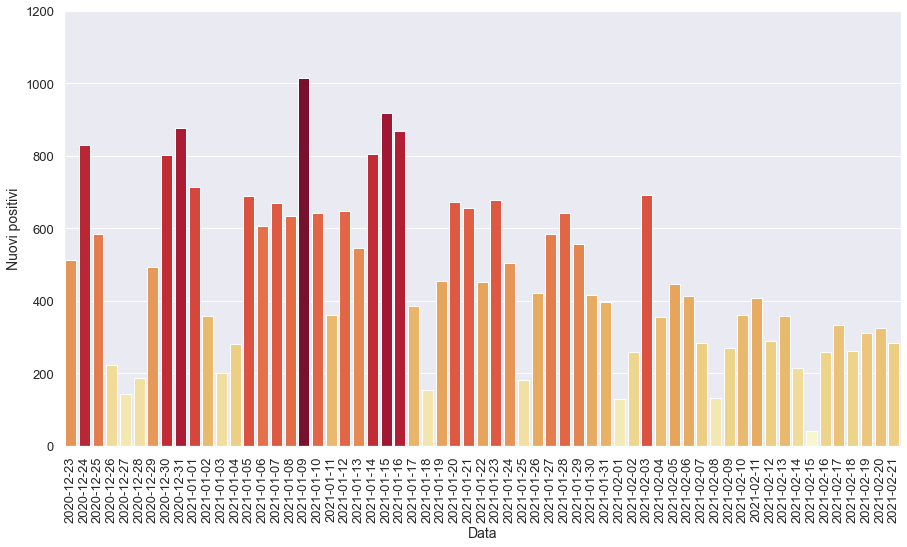

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

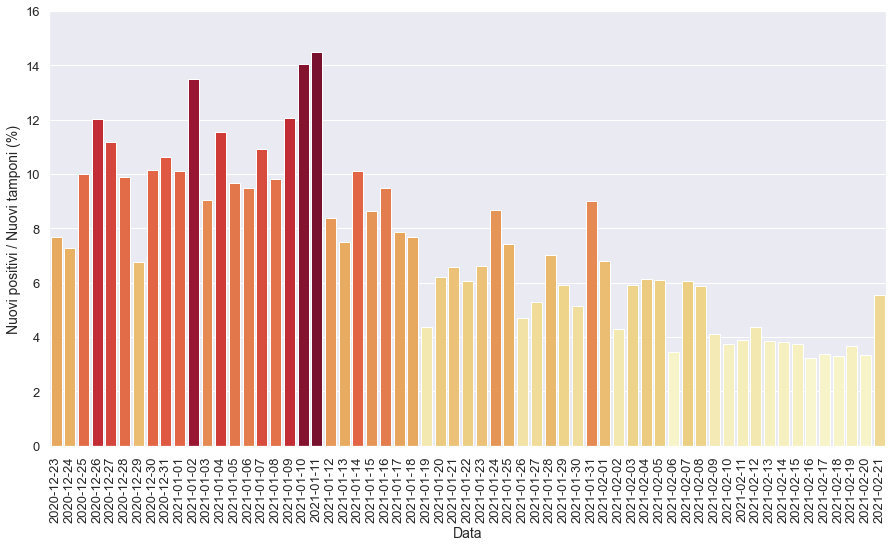

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

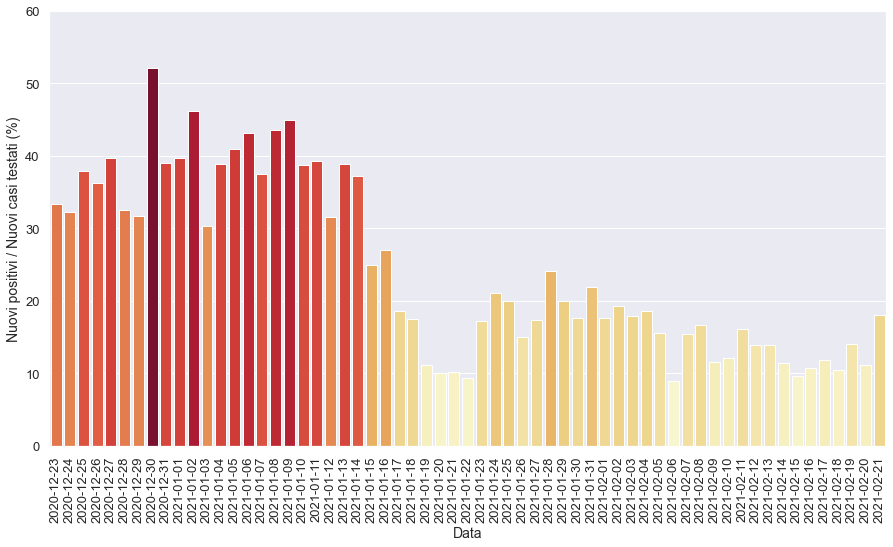

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

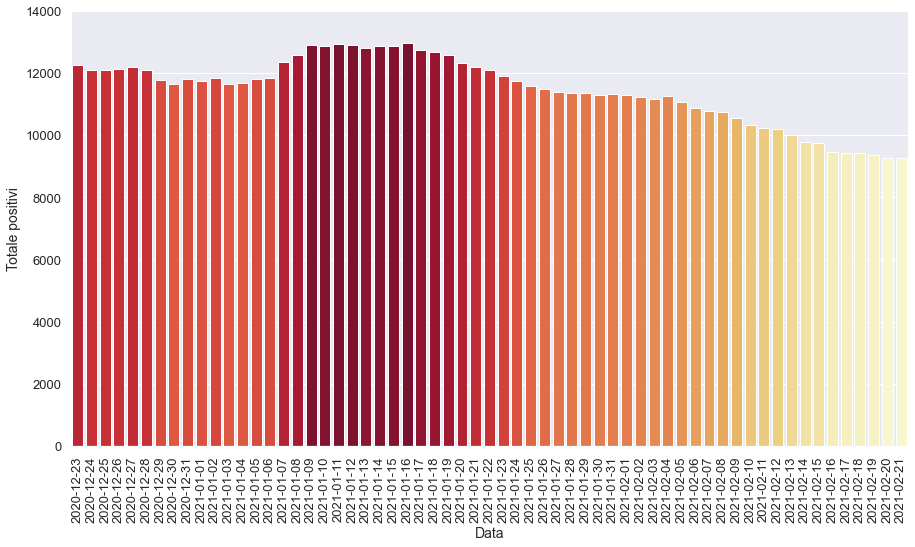

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

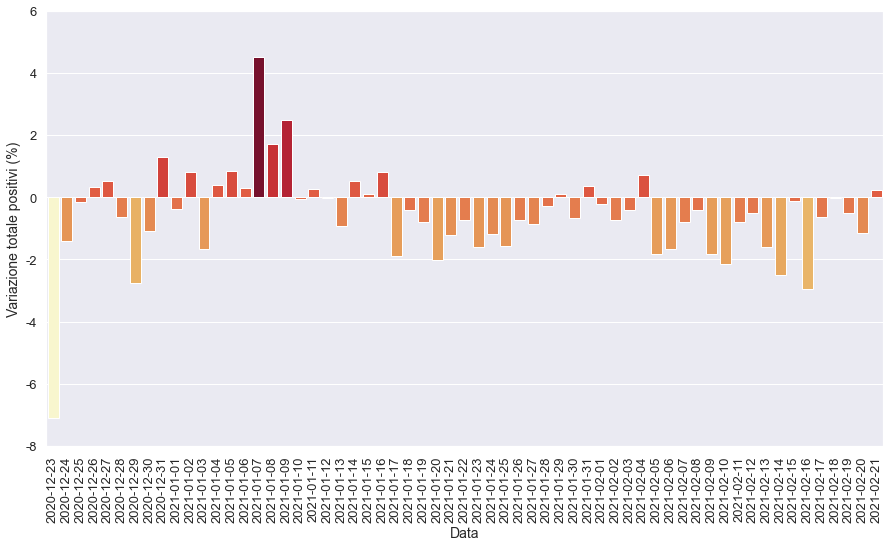

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

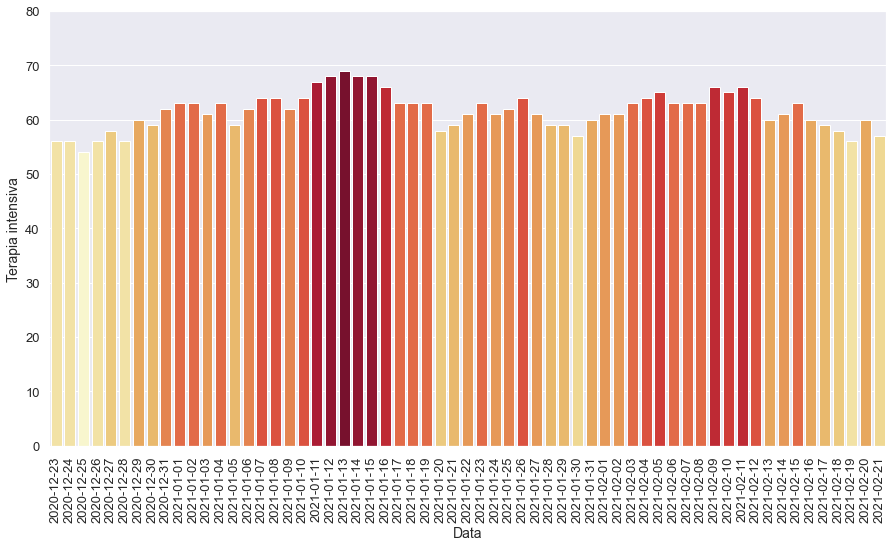

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

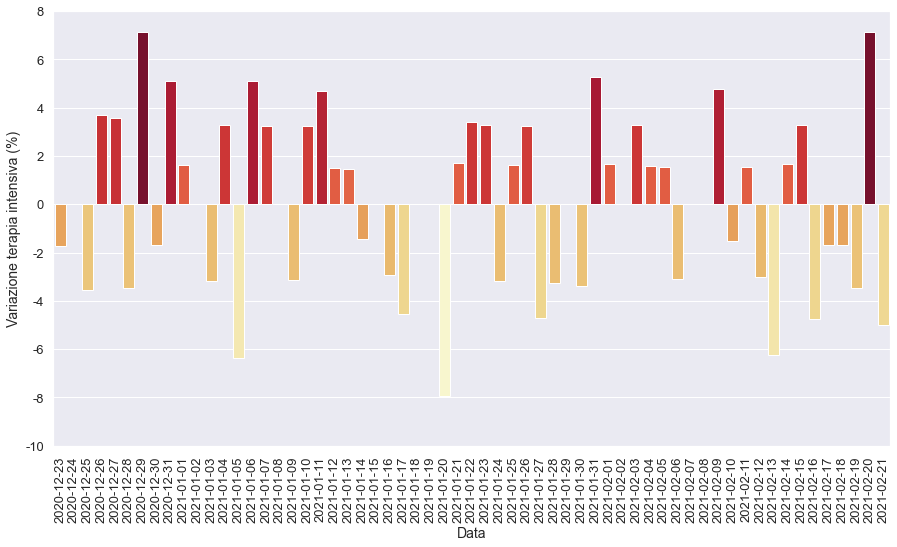

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

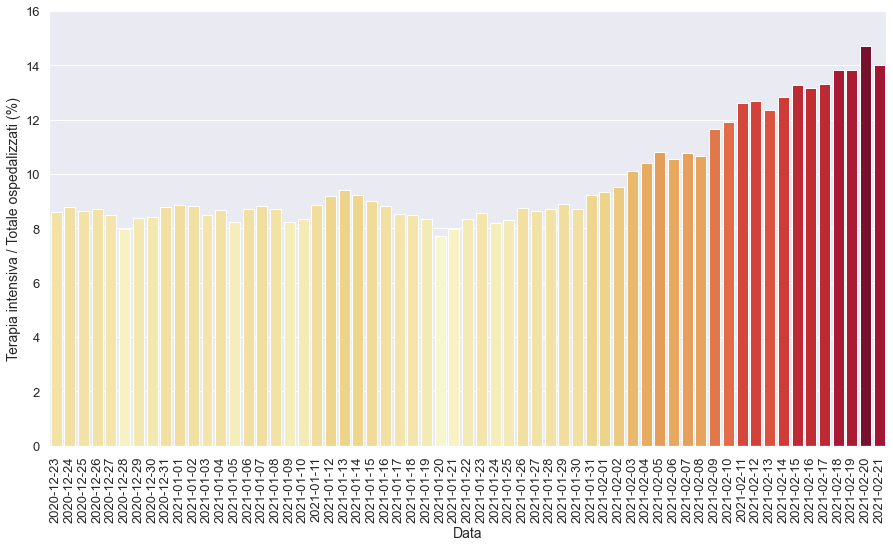

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

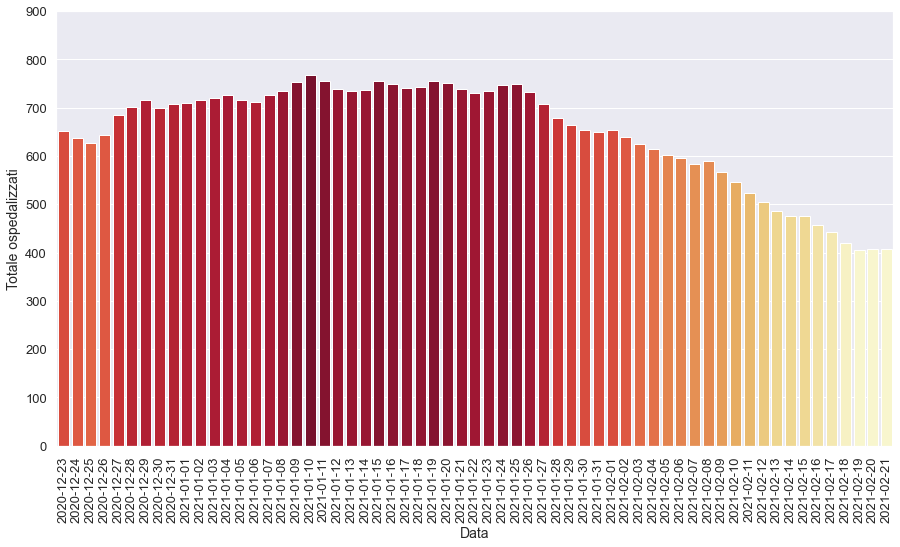

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

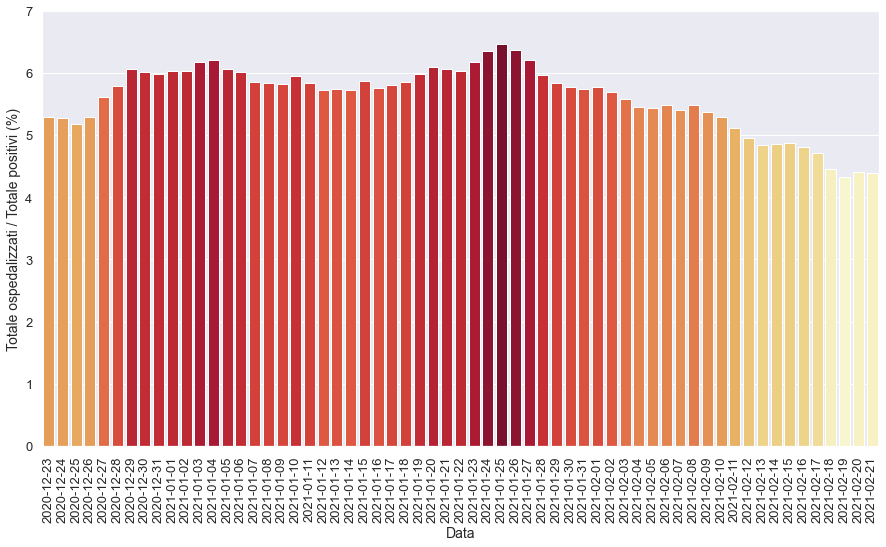

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

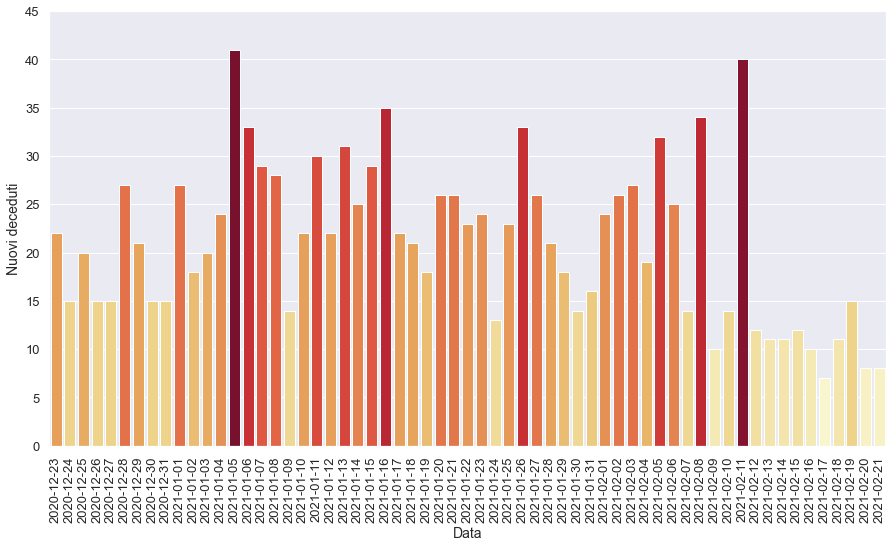

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

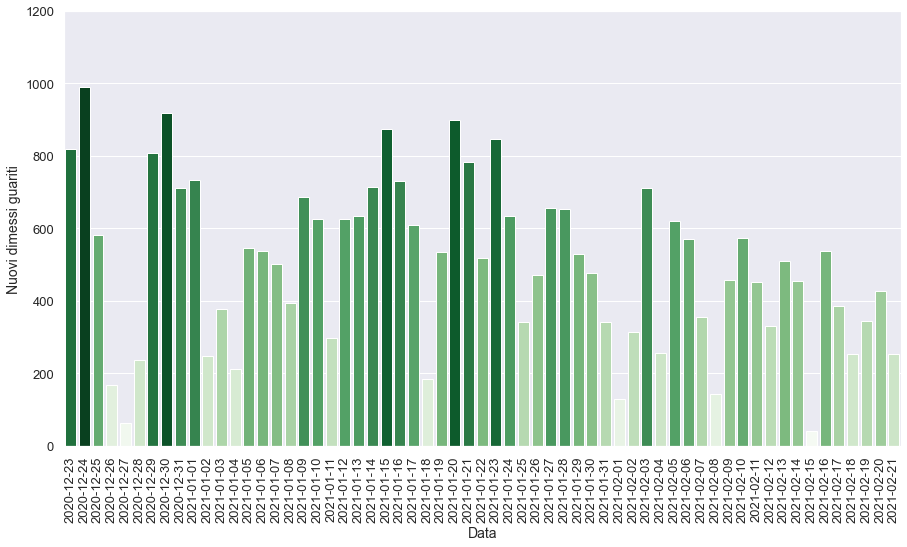

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-22T17:00:00,6,Friuli Venezia Giulia,669,61,730,11360,12090,-90,452,...,23.0,7437.0,4816.0,-81.0,8.36,6.04,6.08,9.39,3.39,-0.74
1,2021-01-23T17:00:00,6,Friuli Venezia Giulia,672,63,735,11163,11898,-192,679,...,24.0,10239.0,3946.0,-197.0,8.57,6.18,6.63,17.21,3.28,-1.59
2,2021-01-24T17:00:00,6,Friuli Venezia Giulia,685,61,746,11010,11756,-142,505,...,13.0,5814.0,2392.0,-153.0,8.18,6.35,8.69,21.11,-3.17,-1.19
3,2021-01-25T17:00:00,6,Friuli Venezia Giulia,686,62,748,10825,11573,-183,181,...,23.0,2438.0,906.0,-185.0,8.29,6.46,7.42,19.98,1.64,-1.56
4,2021-01-26T17:00:00,6,Friuli Venezia Giulia,668,64,732,10758,11490,-83,421,...,33.0,8947.0,2807.0,-67.0,8.74,6.37,4.71,15.00,3.23,-0.72
5,2021-01-27T17:00:00,6,Friuli Venezia Giulia,646,61,707,10685,11392,-98,584,...,26.0,11068.0,3378.0,-73.0,8.63,6.21,5.28,17.29,-4.69,-0.85
6,2021-01-28T17:00:00,6,Friuli Venezia Giulia,619,59,678,10682,11360,-32,642,...,21.0,9160.0,2669.0,-3.0,8.70,5.97,7.01,24.05,-3.28,-0.28
7,2021-01-29T17:00:00,6,Friuli Venezia Giulia,605,59,664,10707,11371,11,557,...,18.0,9433.0,2787.0,25.0,8.89,5.84,5.90,19.99,0.00,0.10
8,2021-01-30T17:00:00,6,Friuli Venezia Giulia,596,57,653,10641,11294,-77,415,...,14.0,8046.0,2345.0,-66.0,8.73,5.78,5.16,17.70,-3.39,-0.68
9,2021-01-31T17:00:00,6,Friuli Venezia Giulia,590,60,650,10683,11333,39,396,...,16.0,4391.0,1806.0,42.0,9.23,5.74,9.02,21.93,5.26,0.35


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

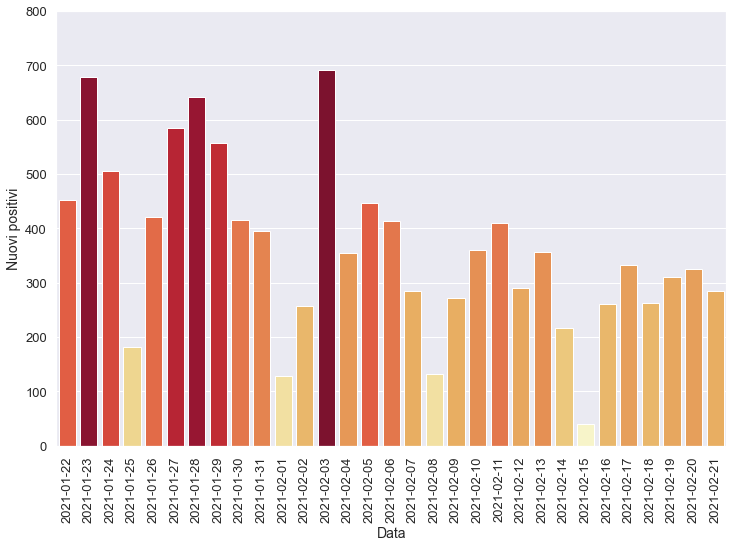

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

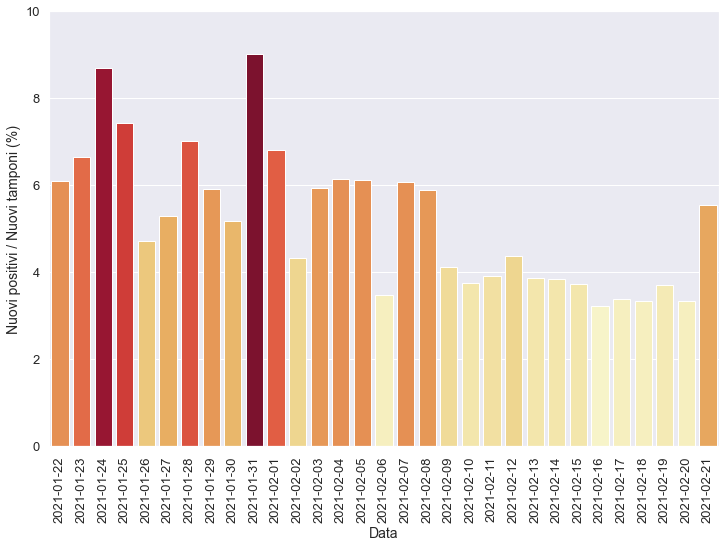

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

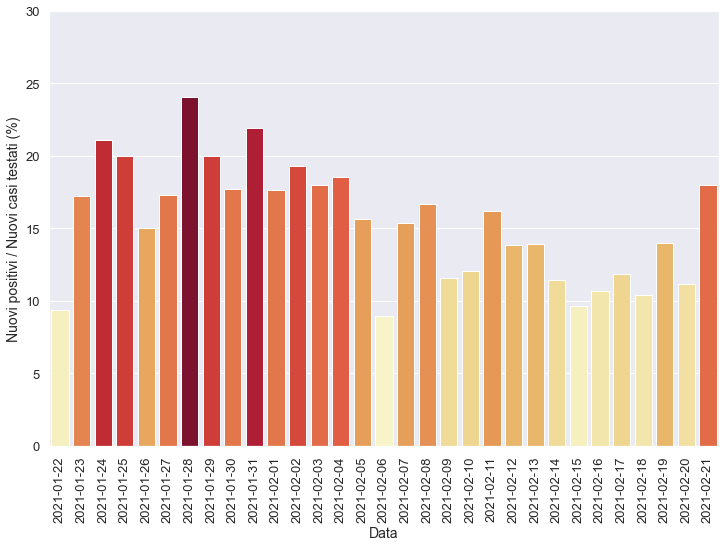

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

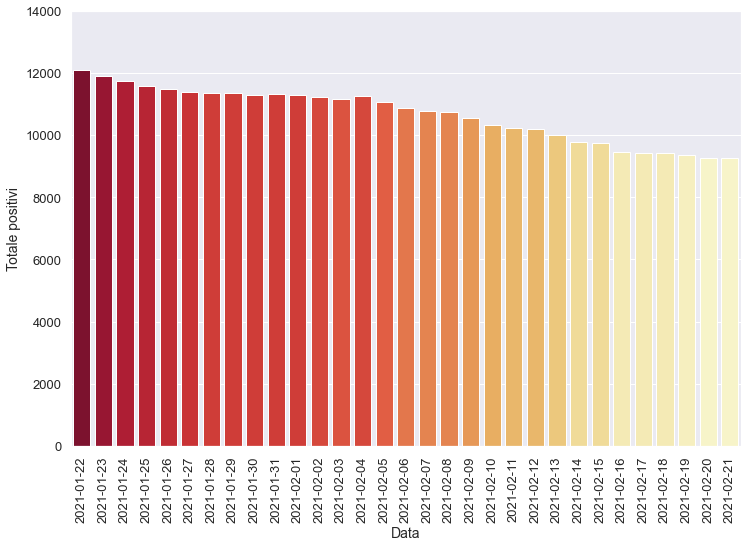

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

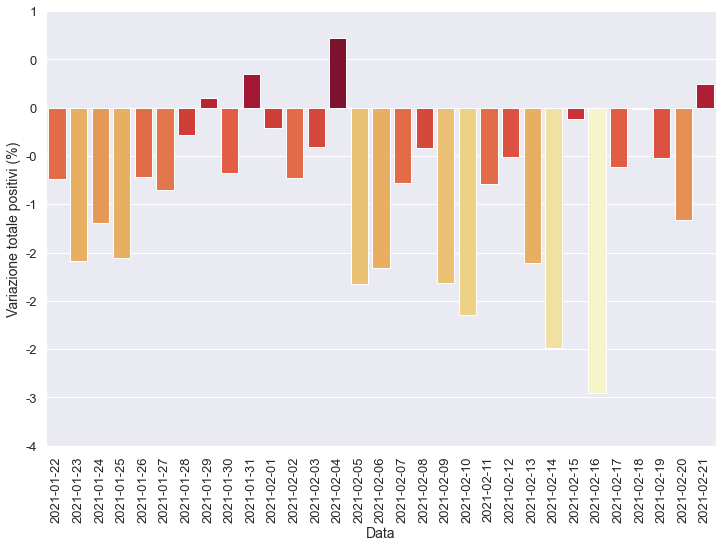

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

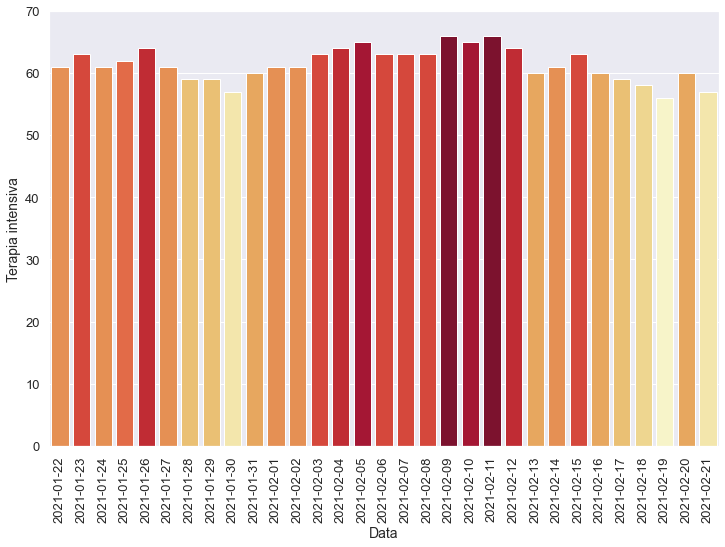

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

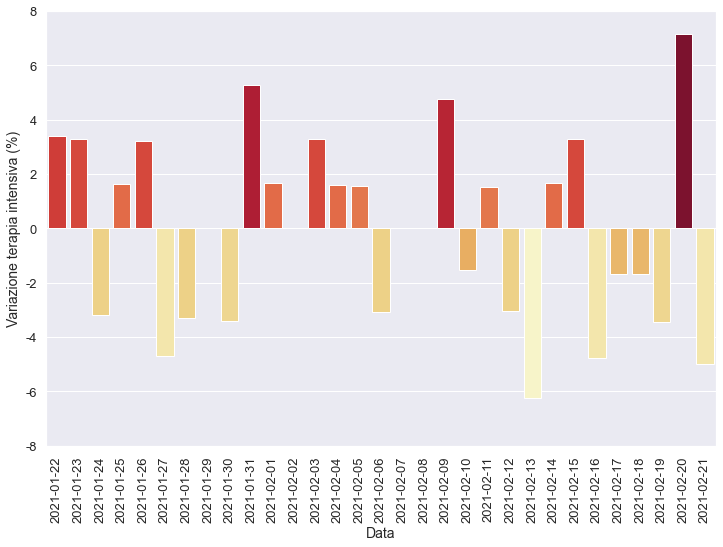

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

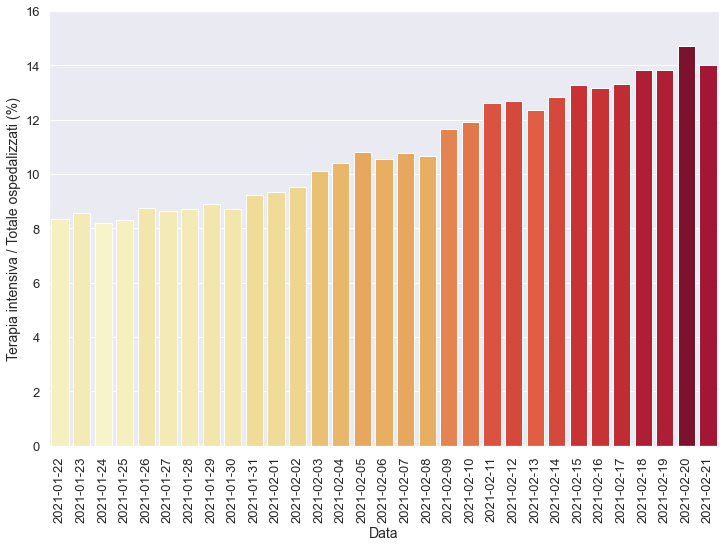

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

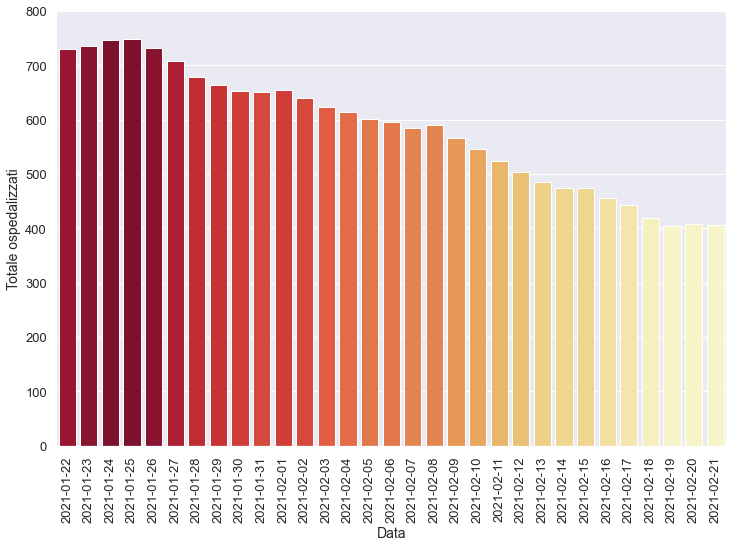

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

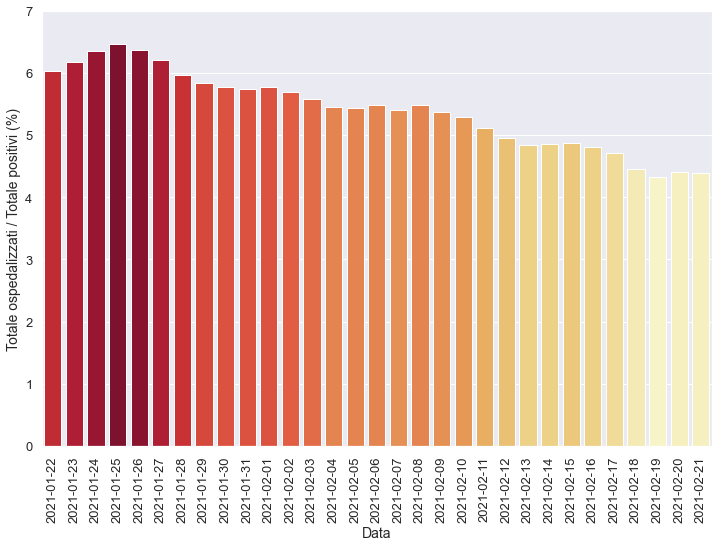

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

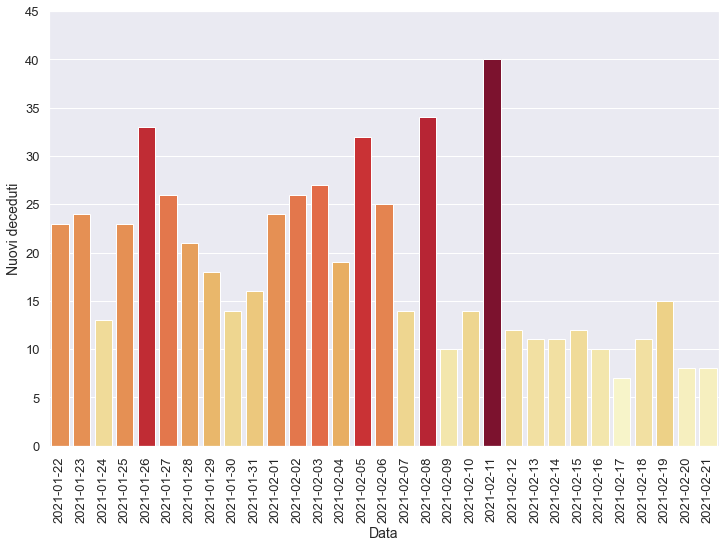

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

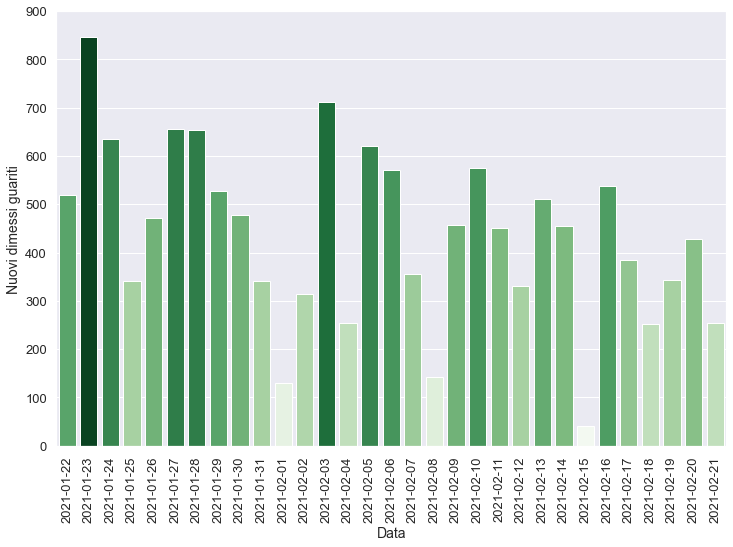

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-02-14T17:00:00,6,Friuli Venezia Giulia,414,61,475,9296,9771,-250,216,...,11.0,5638.0,1887.0,-240.0,12.84,4.86,3.83,11.45,1.67,-2.49
1,2021-02-15T17:00:00,6,Friuli Venezia Giulia,412,63,475,9284,9759,-12,40,...,12.0,1072.0,415.0,-12.0,13.26,4.87,3.73,9.64,3.28,-0.12
2,2021-02-16T17:00:00,6,Friuli Venezia Giulia,396,60,456,9015,9471,-288,260,...,10.0,8082.0,2430.0,-269.0,13.16,4.81,3.22,10.70,-4.76,-2.95
3,2021-02-17T17:00:00,6,Friuli Venezia Giulia,384,59,443,8969,9412,-59,333,...,7.0,9872.0,2807.0,-46.0,13.32,4.71,3.37,11.86,-1.67,-0.62
4,2021-02-18T17:00:00,6,Friuli Venezia Giulia,361,58,419,8991,9410,-2,262,...,11.0,7885.0,2518.0,22.0,13.84,4.45,3.32,10.41,-1.69,-0.02
5,2021-02-19T17:00:00,6,Friuli Venezia Giulia,349,56,405,8956,9361,-49,310,...,15.0,8393.0,2218.0,-35.0,13.83,4.33,3.69,13.98,-3.45,-0.52
6,2021-02-20T17:00:00,6,Friuli Venezia Giulia,348,60,408,8844,9252,-109,326,...,8.0,9792.0,2918.0,-112.0,14.71,4.41,3.33,11.17,7.14,-1.16
7,2021-02-21T17:00:00,6,Friuli Venezia Giulia,350,57,407,8867,9274,22,284,...,8.0,5139.0,1576.0,23.0,14.00,4.39,5.53,18.02,-5.00,0.24


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

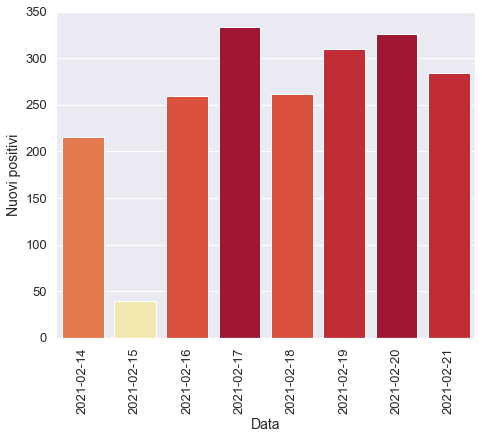

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

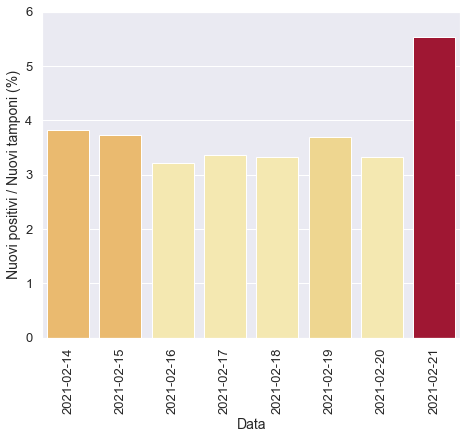

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

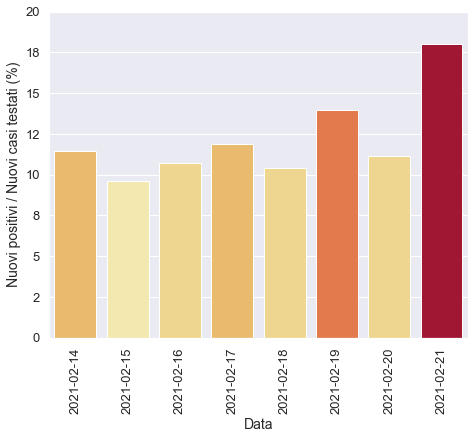

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

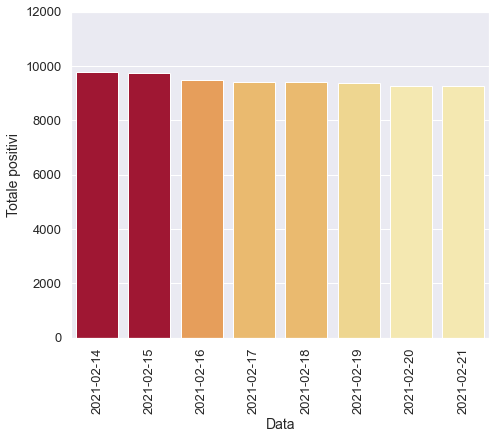

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

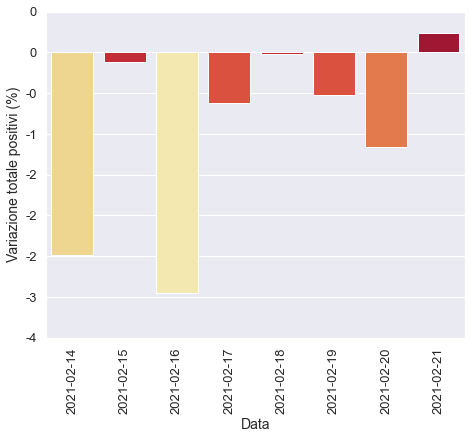

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

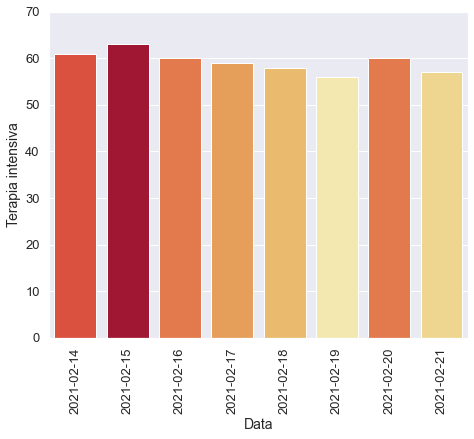

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

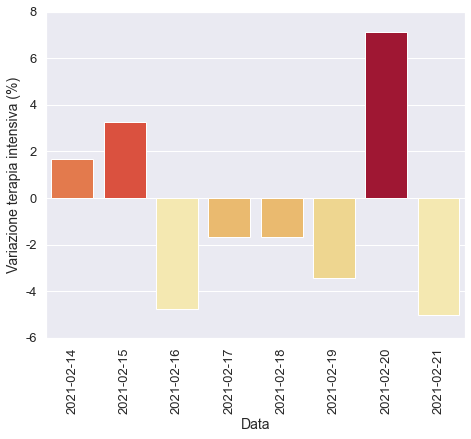

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

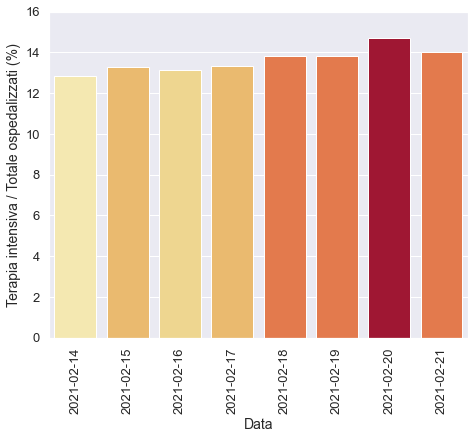

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

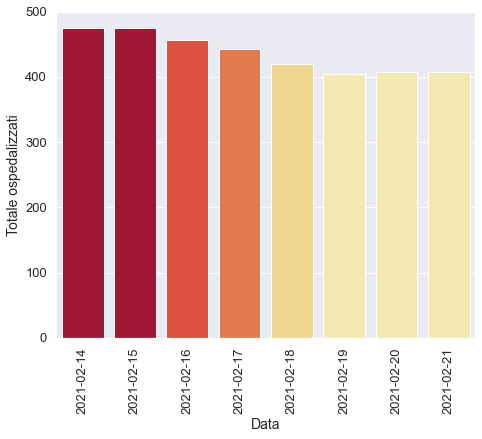

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

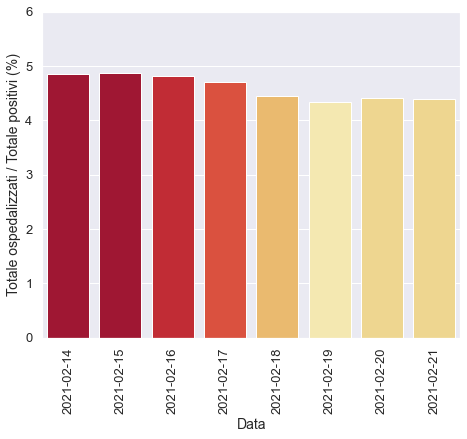

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

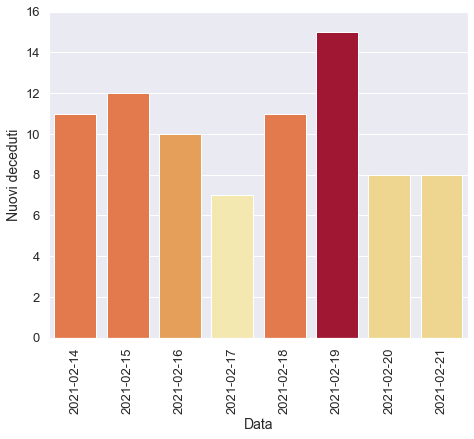

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

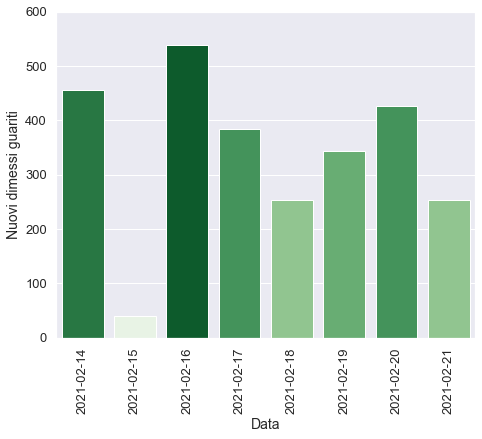

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)